In [1]:
%load_ext autoreload
%autoreload 2
from visiprog.data import *
from visiprog.metriclearning import *
from visiprog.evaluate import *
%matplotlib inline
import numpy as np
from visiprog.metric_learn.fda_visiprog import LFDA_VISIPROG
from metric_learn import LFDA
from sklearn.metrics import pairwise_distances_argmin_min

from IPython.display import Image, display
from sklearn.model_selection import train_test_split
import pandas as pd


import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
from IPython.display import display, HTML

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [2]:
n_list = range(10,150,20)

In [3]:
raw_feature = read_raw_feature()
label_material = read_material_label()
groups_VSP, group_material = read_VSP_group(pappas_only=False)
label_VSP = get_VSP_label(groups_VSP, raw_feature.shape[0])

print(raw_feature.shape[0])

5245


Remove outlier from both dataset

In [4]:
idx_outlier = np.where(label_VSP == 0)[0]
X = raw_feature[~idx_outlier,:]
Y_material = label_material[~idx_outlier]
Y_VSP = label_VSP[~idx_outlier]

print(X.shape[0])

1537


In [5]:
model = LFDA()
model.fit(X, Y_material)
X_fisher = model.transform(X)
res_fda = leave_one_sample_out(X_fisher, Y_material)
print(res_fda['accuracy'])

INFO:visiprog.evaluate:Nearest neighbor on same data
0.971372804164


In [6]:
representative = []

for n in n_list:
    print(n)
    km = KMeans(n_clusters = n, init='k-means++')
    km.fit(X_fisher)

    closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X_fisher)

    representative_label = [Y_material[closest[i]] for i in km.labels_]
    representative_label = np.array(representative_label)

    representative.append(np.mean(representative_label == Y_material))

10
30
50
70
90
110
130


In [7]:
model = LFDA_VISIPROG()
model.fit(X, Y_VSP)
X_vsp = model.transform(X)
res_vsp = leave_one_sample_out(X_vsp, Y_material)
print(res_vsp['accuracy'])

INFO:visiprog.evaluate:Nearest neighbor on same data
0.957709824333


In [8]:
representative_VSP = []

for n in n_list:
    print(n)
    km = KMeans(n_clusters = n, init='k-means++')
    km.fit(X_fisher)

    closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X_fisher)

    representative_label = [Y_material[closest[i]] for i in km.labels_]
    representative_label = np.array(representative_label)

    representative_VSP.append(np.mean(representative_label == Y_material))

10
30
50
70
90
110
130


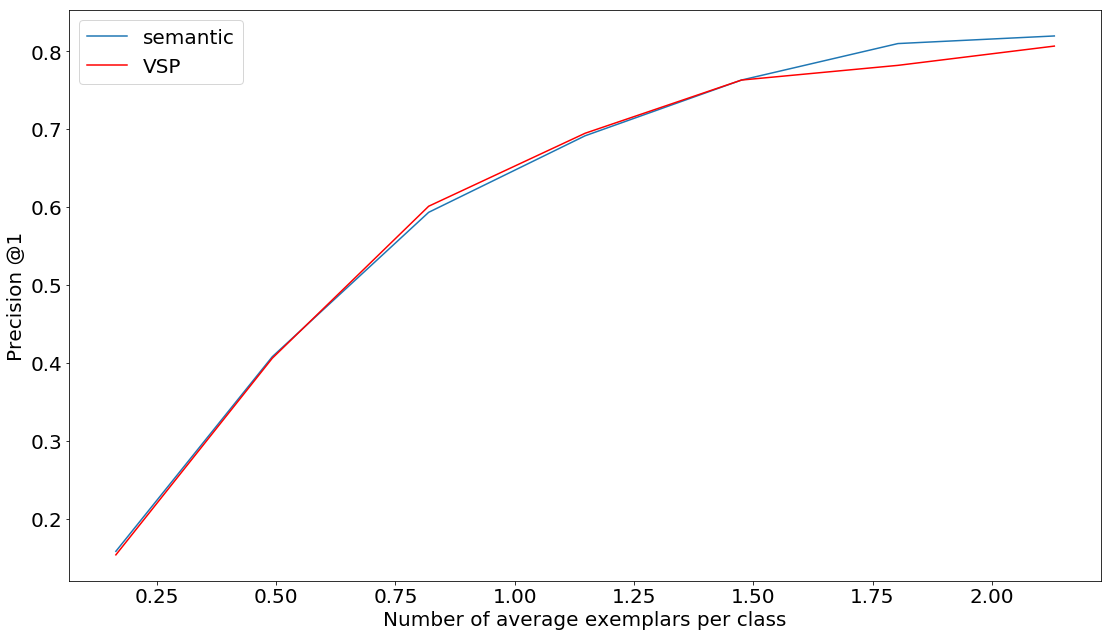

In [9]:
fig = plt.gcf()

matplotlib.rcParams.update({'font.size': 20})

fig.set_size_inches(18.5, 10.5)
plt.plot(np.array(n_list)/61,representative, label='semantic')
plt.plot(np.array(n_list)/61,representative_VSP, 'r', label='VSP')

plt.ylabel('Precision @1')
plt.xlabel('Number of average exemplars per class')

plt.legend()

fig.savefig('thrasos/exemplars_without_outlier.pdf')
fig.savefig('thrasos/exemplars_without_outlier.eps', dpi=1200)